In [11]:
import h5py
import matplotlib.pyplot as plt
import numpy

from dengo.chemical_network import \
    ChemicalNetwork, \
    reaction_registry, \
    cooling_registry, species_registry
import dengo.primordial_rates, dengo.primordial_cooling
from dengo.chemistry_constants import tiny, kboltz, mh

import os
os.environ['YT_DEST'] = '/home/kwoksun2/anaconda2/pkgs/yt-3.3.5-np111py27_2/'


In [24]:
f = h5py.File("data_cvdls_9species.hdf5")
f["H2_1"]

<HDF5 dataset "H2_1": shape (400, 300), type "<f8">

In [39]:
ele_list = []
density_dict = {}
total_charge = numpy.zeros((400))
de_charge = numpy.zeros((400))
for sp in primordial.required_species:
    if sp.name not in primordial.skip_weight:
        name = sp.name
        print(name)
        ele, charge = name.split("_")
        sp_data = numpy.array(f[name])
        if ele not in ele_list:
            ele_list.append(ele)
            total_density_dict[ele] = numpy.zeros((400,300))
        total_density_dict[ele] += sp_data*sp.weight
        total_charge += sp_data[:,-1]*sp.free_electrons

de_charge = f['de'][:,-1]

H2_1
H2_2
He_1
H_m0
He_3
He_2
H_1
H_2


In [37]:
numpy.shape(sp_data[:,-1])

(400,)

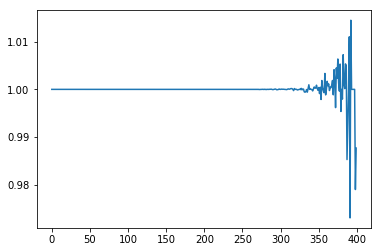

In [40]:
plt.plot(total_charge / de_charge)
plt.show()

In [12]:
dengo.primordial_rates.setup_primordial()

[set(),
 set(),
 {'k01',
  'k02',
  'k03',
  'k04',
  'k05',
  'k06',
  'k07',
  'k08',
  'k09',
  'k10',
  'k11',
  'k12',
  'k13',
  'k14',
  'k15',
  'k16',
  'k17',
  'k18',
  'k19',
  'k21',
  'k22',
  'k23'}]

In [16]:
primordial = ChemicalNetwork()

for i in range(23):
    try:
        primordial.add_reaction("k{0:02d}".format(i+1))
    except:
        pass

Adding reaction: k01 : 1*H_1 + 1*de => 1*H_2 + 2*de
Adding reaction: k02 : 1*H_2 + 1*de => 1*H_1
Adding reaction: k03 : 1*He_1 + 1*de => 1*He_2 + 2*de
Adding reaction: k04 : 1*He_2 + 1*de => 1*He_1
Adding reaction: k05 : 1*He_2 + 1*de => 1*He_3 + 2*de
Adding reaction: k06 : 1*He_3 + 1*de => 1*He_2
Adding reaction: k07 : 1*H_1 + 1*de => 1*H_m0
Adding reaction: k08 : 1*H_m0 + 1*H_1 => 1*H2_1 + 1*de
Adding reaction: k09 : 1*H_1 + 1*H_2 => 1*H2_2
Adding reaction: k10 : 1*H2_2 + 1*H_1 => 1*H2_1 + 1*H_2
Adding reaction: k11 : 1*H2_1 + 1*H_2 => 1*H2_2 + 1*H_1
Adding reaction: k12 : 1*H2_1 + 1*de => 2*H_1 + 1*de
Adding reaction: k13 : 1*H2_1 + 1*H_1 => 3*H_1
Adding reaction: k14 : 1*H_m0 + 1*de => 1*H_1 + 2*de
Adding reaction: k15 : 1*H_m0 + 1*H_1 => 2*H_1 + 1*de
Adding reaction: k16 : 1*H_m0 + 1*H_2 => 2*H_1
Adding reaction: k17 : 1*H_m0 + 1*H_2 => 1*H2_2 + 1*de
Adding reaction: k18 : 1*H2_2 + 1*de => 2*H_1
Adding reaction: k19 : 1*H2_2 + 1*H_m0 => 1*H_1 + 1*H2_1
Adding reaction: k21 : 2*H_1 

In [21]:
for sp in primordial.required_species:
    if sp.name not in primordial.skip_weight:
        print(sp.name, sp.weight)

('H2_1', 2.01588)
('H2_2', 2.01588)
('He_1', 4.002602)
('H_m0', 1.00794)
('He_3', 4.002602)
('He_2', 4.002602)
('H_1', 1.00794)
('H_2', 1.00794)


('ge', 'de')